# Topic Modelling and Word Embeddings for COVID-19 Open Research Dataset

## Abstract

The COVID-19 open research dataset (CORD-19) have been prepared by the White House and a coalition of leading research groups, which contains over 52,000 scholarly articles, including over 41,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. Here I have created the latent semantic analysis and word embedding by using the COVID-19 open research dataset, which might lay a foundation for the future research purposes.

## Data Preprocessing

#### Download Data

First of all, let's download the data. The COVID-19 open research dataset provided by Kaggle contains several data sources, such as the meta data file, and several research papers. Here I chose to download the meta data file which contains the basic information such as titles, abstracts, authors of the research articles.

In [0]:
import os

# Create data folder
os.chdir('/content/')
!rm -rf data
!mkdir data
os.chdir('data')
!pwd

# Download data
!wget --output-document=metadata.csv "https://drive.google.com/uc?export=download&id=17OywCcDnEh8p3FF6AzbxI8s-r-MnSlst"

/content/data
--2020-04-18 14:35:45--  https://drive.google.com/uc?export=download&id=17OywCcDnEh8p3FF6AzbxI8s-r-MnSlst
Resolving drive.google.com (drive.google.com)... 64.233.181.113, 64.233.181.138, 64.233.181.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-34-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vn8l7v5lacoonbs731clusvg85su0k49/1587220500000/05684750869889568925/*/17OywCcDnEh8p3FF6AzbxI8s-r-MnSlst?e=download [following]
--2020-04-18 14:35:48--  https://doc-04-34-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vn8l7v5lacoonbs731clusvg85su0k49/1587220500000/05684750869889568925/*/17OywCcDnEh8p3FF6AzbxI8s-r-MnSlst?e=download
Resolving doc-04-34-docs.googleusercontent.com (doc-04-34-docs.googleusercontent.com)... 172.253.114.132, 2607:f8b0:4001:c22::84
Connecting to doc-04-34-docs.googleusercont

#### Extract Documents

Considering that the abstract part of a research paper provides a brief summary of the research topic, therefore, here the abstracts from all the research papers are extracted as corpus.

In [0]:
import csv

corpus = []

# Open metadata file
with open('metadata.csv') as csv_file:
    
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)

    # Extract abstracts from all the papers
    for lines in csv_reader:
        abstract = lines[8]
        corpus.append(abstract)

print('Total corpus extracted: {}'.format(len(corpus)))
print('Example:')
for i in range(5):
    sample = corpus[i]
    print('{}: {}'.format((i + 1), sample))

Total corpus extracted: 51078
Example:
1: BACKGROUND: Rhinovirus, the most common cause of upper respiratory tract infections, has been implicated in asthma exacerbations and possibly asthma deaths. Although the method of transmission of rhinoviruses is disputed, several studies have demonstrated that aerosol transmission is a likely method of transmission among adults. As a first step in studies of possible airborne rhinovirus transmission, we developed methods to detect aerosolized rhinovirus by extending existing technology for detecting infectious agents in nasal specimens. METHODS: We aerosolized rhinovirus in a small aerosol chamber. Experiments were conducted with decreasing concentrations of rhinovirus. To determine the effect of UV irradiation on detection of rhinoviral aerosols, we also conducted experiments in which we exposed aerosols to a UV dose of 684 mJ/m(2). Aerosols were collected on Teflon filters and rhinovirus recovered in Qiagen AVL buffer using the Qiagen QIAamp 

#### Preprocess Data

Before working on the corpus, we need to preprocess the data by converting all the words to lower case, and also remove non-alphabet characters, such as punctuation marks.

In [0]:
import re

# Convert to lower case
corpus = [x.lower() for x in corpus]

# Remove non-alphabet characters
corpus = [re.sub(r'[^a-z0-9 ]+', '', x) for x in corpus]

print('After data clean-up:')
for i in range(5):
    sample = corpus[i]
    print('{}: {}'.format((i + 1), sample))

After data clean-up:
1: background rhinovirus the most common cause of upper respiratory tract infections has been implicated in asthma exacerbations and possibly asthma deaths although the method of transmission of rhinoviruses is disputed several studies have demonstrated that aerosol transmission is a likely method of transmission among adults as a first step in studies of possible airborne rhinovirus transmission we developed methods to detect aerosolized rhinovirus by extending existing technology for detecting infectious agents in nasal specimens methods we aerosolized rhinovirus in a small aerosol chamber experiments were conducted with decreasing concentrations of rhinovirus to determine the effect of uv irradiation on detection of rhinoviral aerosols we also conducted experiments in which we exposed aerosols to a uv dose of 684 mjm2 aerosols were collected on teflon filters and rhinovirus recovered in qiagen avl buffer using the qiagen qiaamp viral rna kit qiagen corp valencia

Stop words, such as "because", "so", etc. in English, are defined as the commonly used words in any language, which are usually eliminated during natural language processing and text mining, in order to focus on the more important words. Based on my finding, the COVID-19 open research dataset contains research articles not only in English, but also in other European languages as well, such as Spanish and French. Therefore, we shall also consider precluding the interference from the stop words in the languages other than English.

In [0]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

# Prepare stopwords for several languages
stop_words = list(stopwords.words('english'))
stop_words += list(stopwords.words('french'))
stop_words += list(stopwords.words('spanish'))

print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

## Latent Semantic Analysis

Latent Semantic Analysis, or LSA, refers to one of the techniques to discern the latent semantic concepts by analyzing the documents. Here we will create a topic modelling by using the COVID-19 open research dataset.

#### Create Document-Term Matrix

Document-Term Matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

One of the measurement is TF-IDF. 

"TF" refers to the Term-Frequency, which describes the frequency of a particular word appearing in a certain document. In the formula below, $n_{i,j}$ refers to the total number of times that term $t_{i}$ appears in the document $d_j$. Therefore, $TF_{i,j}$ refers to the frequency that term $t_{i}$ appears in the document $d_j$.

$TF_{i,j}=\frac{n_{i,j}}{\sum_k^m(n_{k,j})}$

"IDF" refers to the Inverse Document Frequency, which describes the frequency of a particular word appearing in all the documents in the corpus. In the formula below, $D$ refers to the total number of documents, and $j:t_i\in d_j$ refers to the total number of documents which contains such term. The reason why we plus 1 to $j:t_i\in d_j$ is to preclude the case when the denominator is 0.

$IDF_{i}=\lg{\frac{D}{1+j:t_i\in d_j}}$

Then, the statistical calculation involves the product of "TF" and "IDF".

$TF-IDF = TF \times IDF$

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create document-term matrix through TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, 
                             max_features=1000)
X = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()

# Check the shape
print(X.shape)

# Show document-term matrix
terms_df = pd.DataFrame(X.toarray(), columns=terms)
terms_df.sort_index().head(10)

(51078, 1000)


,10,100,11,12,13,14,15,16,17,18,20,2003,2009,2019,2019ncov,2020,21,23,24,25,30,40,50,60,95,ability,able,absence,abstract,according,ace2,acid,acids,across,action,activation,active,activities,activity,acute,...,variety,various,vector,vectors,ventilation,version,via,viral,virions,virulence,virus,viruses,vitro,vivo,vs,water,weeks,weight,well,western,whereas,whether,whole,wide,widely,wild,wildtype,within,without,work,workers,world,worldwide,would,wuhan,year,years,yet,young,zoonotic
0,0.0,0.000000,0.0,0.0,0.0778,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.078816,0.0,0.0,0.068105,0.043793,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.112878,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.035776,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.058797,0.0,0.0,0.000000,0.0,0.0,0.242386,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.050466,...,0.0,0.063498,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.034979,0.044985,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.057377,0.0,0.0,0.000000,0.070201,0.0,0.073477,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099993,0.086108,0.089189,0.0,0.069374,0.060502,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.194121,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085601,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.057518,...,0.0,0.072371,0.09713,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.119599,0.256354,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.110953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.067246,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.323640,0.0,0.0,0.186437,0.119885,0.0,0.0,0.0,0.0,0.0,0.0,0.070617,0.0,0.0,0.0,0.0,0.109021,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000

#### Visualize TF-IDF Scores

Then, let's try to visualize the TF-IDF scores of each term in the COVID-19 open research dataset.

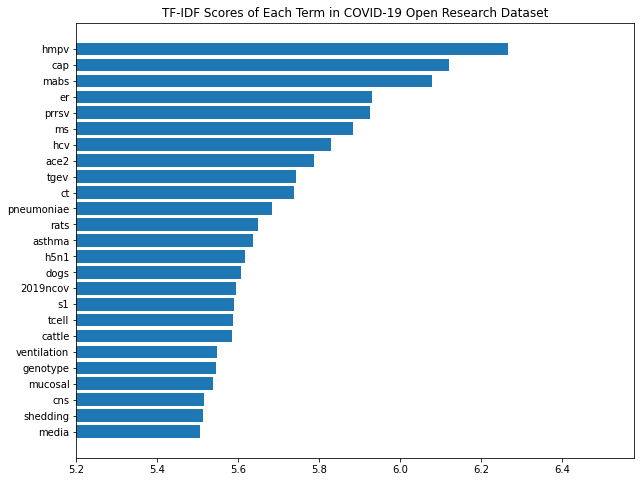

In [0]:
import matplotlib.pyplot as plt

# Visualize TF-IDF scores of each term
idfs = vectorizer.idf_
terms_idf = zip(terms, idfs)
sorted_idfs = sorted(terms_idf, key=lambda x:x[1], reverse=True)[:25]

sorted_terms = [x[0] for x in sorted_idfs]
sorted_idfs = [x[1] for x in sorted_idfs]

plt.figure(figsize=(10, 8))
plt.title('TF-IDF Scores of Each Term in COVID-19 Open Research Dataset')
plt.barh(sorted_terms, sorted_idfs)
plt.xlim(xmin=5.2)
plt.gca().invert_yaxis()
plt.show()

#### Perform LSA through SVD

Singular Value Decomposition, or SVD, is a process of the factorization of the matrix, which is usually used in Latent Semantic Analysis to create topic modelling. The formula is described as follows.

$A=U\Sigma V^T$

The $A$ stands for the input data matrix, $U$ and $V$ refers to the left and right singular vector respectively, and $\Sigma$ is a diagonal matrix with singular values sorted from the largest to the smallest. 

In other words, the SVD process may further be represented as follows.

$A=u_1\sigma_1v_1^T+u_2\sigma_2v_2^T+...+u_n\sigma_nv_n^T$

Since $\sigma_1 > \sigma_2 > ... > \sigma_n$, therefore, we will find the top 10 topics by truncating the first 10 singular values in the formula above ($u_1\sigma_1v_1^T+u_2\sigma_2v_2^T+...+u_{10}\sigma_{10}v_{10}^T$).

In [0]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=10)
svd_model.fit(X)

components = svd_model.components_
print('Total topics: {}'.format(len(components)))

Total topics: 10


Then, let's print out the topics.

In [0]:
# Show the topics
for i, component in enumerate(components):
    terms_component = zip(terms, component)
    sorted_terms = sorted(terms_component, key=lambda x:x[1], reverse=True)[:10]
    sorted_terms = [x[0] for x in sorted_terms]
    printed_terms = ' '.join(sorted_terms)
    print('Topic {}: {}'.format(i, printed_terms))
    print(' ')

Topic 0: virus viral infection cells viruses respiratory patients protein disease human
 
Topic 1: patients health respiratory covid19 cases disease clinical public influenza care
 
Topic 2: health public diseases infectious global disease research new development systems
 
Topic 3: cells patients mice infection cell ifn immune expression response responses
 
Topic 4: influenza viruses virus infections viral infection immune mice human respiratory
 
Topic 5: unknown viruses viral host sars infection respiratory replication infections acute
 
Topic 6: samples vaccine strains pedv assay mice detection unknown antibodies calves
 
Topic 7: merscov sarscov coronavirus sars virus influenza respiratory vaccine syndrome antibodies
 
Topic 8: influenza virus covid19 rna cells pandemic cases health epidemic china
 
Topic 9: influenza protein proteins patients fusion pandemic membrane health binding activity
 


## Word2vec

Word2vec is a 2 layer neural network that is trained to produce word embeddings. Besides, Word2vec can utilize two model architecture to create distributed representation of words: CBOW (Continuous Bag-of-Words) and Skip Grams. The difference is as follows.

|            | Input       | Output      | Example                       |
|------------|-------------|-------------|-------------------------------|
| CBOW       | Word Context     | Target word | "I like <u>orange</u> juice." |
| Skip Grams | Target word | Word Context     | "<u>I</u> <u>like</u> orange <u>juice</u>."        |

#### Train Word2vec Model

I have tried two different libraries to train Word2vec model: one is using Tensorflow, another is using Gensim.

First of all, I tried to use Tensorflow to create Word2vec model, constructed by an embedding layer and a dense layer with a softmax activation function. 

Since we have millions of words in the corpus, it becomes **extremely slow** to train the model when using softmax as the output layer function.

Nevertheless, **hierarchical softmax**, by using a huffman tree, significantly accelerates the training process to $O(\log_2{N})$, compared to the normal softmax function, which takes $O(N)$ training time. 

Considering that Tensorflow has not yet provided hierarchical softmax function in its package, I switched to use Gensim library to train Word2vec model.

In [0]:
from gensim.models.word2vec import Word2Vec
import nltk
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

embed_size = 150
window_size = 2

tokenizer = nltk.WordPunctTokenizer()
tokenized_corpus = [tokenizer.tokenize(doc) for doc in corpus]

w2v_model = Word2Vec(tokenized_corpus, 
                     size=embed_size, 
                     window=window_size, 
                     min_count=1, 
                     sg=0, # Cbow
                     hs=1) # Hierarchical softmax

2020-04-18 14:36:05,322 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-04-18 14:36:05,323 : INFO : collecting all words and their counts
2020-04-18 14:36:05,324 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-18 14:36:05,732 : INFO : PROGRESS: at sentence #10000, processed 2016678 words, keeping 67362 word types
2020-04-18 14:36:06,119 : INFO : PROGRESS: at sentence #20000, processed 3838172 words, keeping 99303 word types
2020-04-18 14:36:06,396 : INFO : PROGRESS: at sentence #30000, processed 5097315 words, keeping 125784 word types
2020-04-18 14:36:06,725 : INFO : PROGRESS: at sentence #40000, processed 6567168 words, keeping 151388 word types
2020-04-18 14:36:07,083 : INFO : PROGRESS: at sentence #50000, processed 8089750 words, keeping 172558 word types
2020-04-18 14:36:07,120 : INFO : collected 174558 word types from a corpus of 8245811 raw words and 51078 sentences
2020-04-18 14:36:07,121 : INFO : Loadin

#### Find Similar Words

Then, let's find some similar words.

In [0]:
search_terms = ['protein', 'h5n1', 'health', 'public', 'china', 'drug']
similar_words_dict = {}
for search_term in search_terms:
    similar_words_list = []
    similar_words = w2v_model.wv.similar_by_word(search_term)
    for similar_word in similar_words:
        word = similar_word[0]
        similar_words_list.append(word)
    similar_words_dict[search_term] = similar_words_list
    print('{}: {}'.format(search_term, similar_words_list))

2020-04-18 14:38:16,680 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


protein: ['proteins', 'glycoprotein', 'glycoproteins', 'gene', 'proteinmediated', 'polypeptide', 'proteinspecific', 'genes', 'ns1ns2', 'nucleoprotein']
h5n1: ['h7n9', 'h9n2', 'ah5n1', 'h1n1', 'ah7n9', 'influenza', 'h3n2', 'ah1n1', 'iav', 'h9']
health: ['heath', 'tempers', 'healths', 'privatesector', 'educating', 'topos', 'privateforprofit', 'peptideatlas', 'healthprimary', 'healthscientific']
public: ['global', 'diplomacy', 'authorities', 'h3africa', 'careinterventions', 'chnri', 'chinaafrica', 'security', 'ministers', 'servicesconclusionsthe']
china: ['vietnam', 'iran', 'india', 'taiwan', 'europe', 'brazil', 'thailand', 'singapore', 'city', 'italy']
drug: ['drugs', 'therapeutics', 'broadspectrum', 'antivirals', 'therapies', 'microbicide', 'anticancer', 'medication', 'therapeutic', 'chemotherapeutics']


#### Visualize Word Embeddings

Last but not least, let's create diagram of word embeddings in COVID-19 open research dataset.

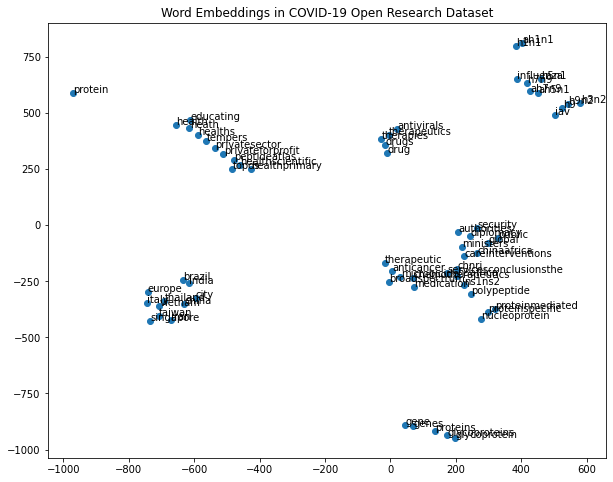

In [0]:
from sklearn.manifold import TSNE
import numpy as np

words = sum([[k] + v for k, v in similar_words_dict.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(10, 8))
plt.title('Word Embeddings in COVID-19 Open Research Dataset')
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Conclusion

To conclude, this notebook has created the latent semantic analysis and word embedding by using the COVID-19 open research dataset.

## Reference

1. [TF-IDF 原理与实现](https://zhuanlan.zhihu.com/p/97273457)
2. [Deep Learning基础--SVD奇异值分解](https://www.cnblogs.com/shixiangwan/p/7570755.html)
3. [COVID-19 Open Research Dataset Challenge (CORD-19)](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)
4. [Implementing Deep Learning Methods and Feature Engineering for Text Data: The Continuous Bag of Words (CBOW)](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html)
5. [Word Embeddings](https://github.com/aksinghal86/WordEmbeddings)
6. [Word2Vec Model](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html)